In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import joblib                      # save/load model
from google.colab import drive     # drive
from sklearn.metrics import make_scorer
from math import sqrt


In [2]:
drive.mount('/content/drive', force_remount=True)   # drive

# Dir in drive to store model
MODEL_DIR = "/content/drive/MyDrive/colab_models"
import os
os.makedirs(MODEL_DIR, exist_ok=True)

print("Model directory:", MODEL_DIR)


Mounted at /content/drive
Model directory: /content/drive/MyDrive/colab_models


In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df  = pd.read_csv(url)

df.columns = df.columns.str.strip().str.lower()     # clean headers
print(df.head())                                    # heads dataset


   unnamed: 0     tv  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
X = df[['tv', 'radio', 'newspaper']].values   # inputs
y = df['sales'].values                        # output


In [10]:
def rmse(y_true, y_pred):               # custom scorer for RMSE
    return sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores   = cross_val_score(model, X, y,  scoring='r2', cv=kf)
mse_scores  = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = -cross_val_score(model, X, y, scoring=rmse_scorer, cv=kf)
print("5-Fold CV Results of Advertising")

for i, (r2, mse, rmse_) in enumerate(zip(r2_scores, mse_scores, rmse_scores), 1):
    print(f"Fold {i}:  R² = {r2:.4f} |  MSE = {mse:.4f} |  RMSE = {rmse_:.4f}")

print("-----------------------------------------------------")
print(f"Average R²   : {r2_scores.mean():.4f}")
print(f"Average MSE  : {mse_scores.mean():.4f}")
print(f"Average RMSE : {rmse_scores.mean():.4f}")


5-Fold CV Results of Advertising
Fold 1:  R² = 0.8994 |  MSE = 3.1741 |  RMSE = 1.7816
Fold 2:  R² = 0.8190 |  MSE = 3.2937 |  RMSE = 1.8149
Fold 3:  R² = 0.9340 |  MSE = 1.6228 |  RMSE = 1.2739
Fold 4:  R² = 0.9010 |  MSE = 2.8297 |  RMSE = 1.6822
Fold 5:  R² = 0.8603 |  MSE = 3.9051 |  RMSE = 1.9761
-----------------------------------------------------
Average R²   : 0.8827
Average MSE  : 2.9651
Average RMSE : 1.7057


In [11]:
model.fit(X, y) # fit the model

y_pred_full = model.predict(X)
full_r2   = r2_score(y, y_pred_full)
full_mse  = mean_squared_error(y, y_pred_full)
full_rmse = sqrt(full_mse)

print(f"\nFull-fit R of Advertising²   : {full_r2:.4f}")
print(f"Full-fit MSE  : {full_mse:.4f}")
print(f"Full-fit RMSE : {full_rmse:.4f}")



Full-fit R of Advertising²   : 0.8972
Full-fit MSE  : 2.7841
Full-fit RMSE : 1.6686


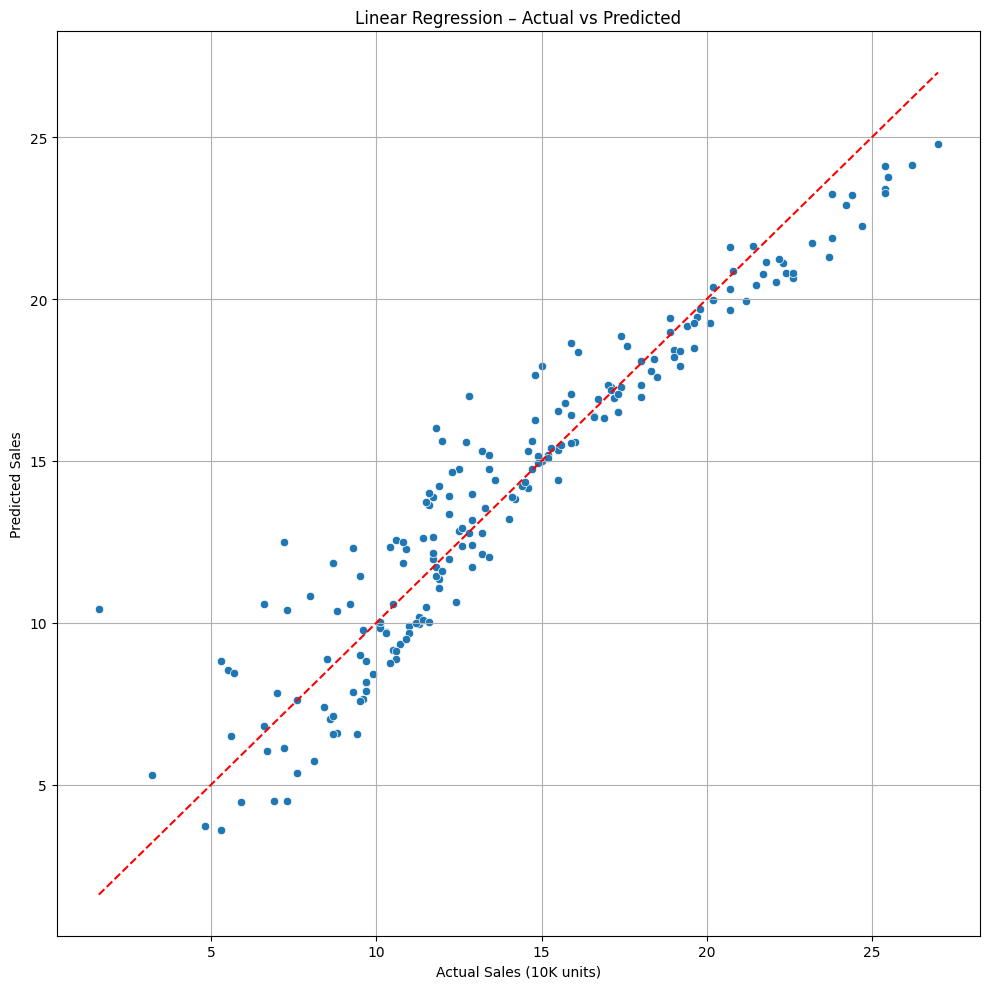

In [7]:
# Visualization
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y, y=model.predict(X))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales (10K units)")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression – Actual vs Predicted")
plt.grid(True); plt.tight_layout()
plt.show()


In [8]:
# Save model because we dont wanna train each run time
model_path = f"{MODEL_DIR}/tv_sales_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved to: {model_path}")


Model saved to: /content/drive/MyDrive/colab_models/tv_sales_model.pkl


In [9]:
# Load model
lin_reg_multi = joblib.load(model_path)
print("Model loaded.  Coefficients:", lin_reg_multi.coef_)

# Predict TV = 200 K, Radio = 25 K, Newspaper = 15 K
X_new = np.array([[200, 25, 15]])
pred   = lin_reg_multi.predict(X_new)

print(f"\nPredicted Sales for [TV=200, Radio=25, Newspaper=15] (K$): "
      f"{pred[0]:.2f} (10K units)")


Model loaded.  Coefficients: [ 0.04576465  0.18853002 -0.00103749]

Predicted Sales for [TV=200, Radio=25, Newspaper=15] (K$): 16.79 (10K units)
